In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = "C:/Users/SAPTARSHI/Downloads/demographical_factors.xlsx"  
df_demographical = pd.read_excel(file_path)

In [3]:
# Define independent variables (X) and target variable (y)
X_demographical = df_demographical.drop(columns=["Have you ever crossed the street during a red light?"])
y_demographical = df_demographical["Have you ever crossed the street during a red light?"]

In [4]:
# Standardize continuous variables
scaler = StandardScaler()
X_demographical_scaled = scaler.fit_transform(X_demographical)

In [5]:
# Add constant for intercept
X_const_demographical = sm.add_constant(X_demographical_scaled)


In [6]:
# Split dataset into training and testing sets
X_train_dem, X_test_dem, y_train_dem, y_test_dem = train_test_split(
    X_const_demographical, y_demographical, test_size=0.2, random_state=42
)


In [7]:
# Train logistic regression model using statsmodels
logit_model_dem = sm.Logit(y_train_dem, X_train_dem)
result_dem = logit_model_dem.fit(disp=0)


In [8]:

# Get feature importance (coefficients) and calculate odds ratios
coefficients_dem = result_dem.params
odds_ratios_dem = np.exp(coefficients_dem)
p_values_dem = result_dem.pvalues
conf_intervals_dem = result_dem.conf_int()
conf_intervals_dem.columns = ['2.5% CI', '97.5% CI']


In [9]:
# Create a DataFrame to display feature importance, odds ratios, p-values, and confidence intervals
importance_df_dem = pd.DataFrame(
    {
        "Feature": X_demographical.columns.insert(0, 'Intercept'),
        "Coefficient": coefficients_dem,
        "Odds_Ratio": odds_ratios_dem,
        "P-Value": p_values_dem,
        "2.5% CI": conf_intervals_dem['2.5% CI'],
        "97.5% CI": conf_intervals_dem['97.5% CI']
    }
).sort_values(by="Odds_Ratio", ascending=False)

In [10]:
# Print feature importance, odds ratios, p-values, and confidence intervals
print("Feature Importance, Odds Ratios, P-Values, and Confidence Intervals:")
print(importance_df_dem)

Feature Importance, Odds Ratios, P-Values, and Confidence Intervals:
                                                 Feature  Coefficient  \
x1                                             Age Group     0.351870   
x2                                                Gender     0.276891   
x4     Approximate monthly income of the person who v...     0.252123   
x6                                    Driving Experience     0.154837   
x3                                            Occupation    -0.072180   
x5                                       Education level    -0.566690   
const                                          Intercept    -1.336162   

       Odds_Ratio       P-Value   2.5% CI  97.5% CI  
x1       1.421724  7.513950e-03  0.093879  0.609862  
x2       1.319022  3.565273e-02  0.018571  0.535211  
x4       1.286754  5.248238e-02 -0.002705  0.506951  
x6       1.167468  1.793062e-01 -0.071149  0.380823  
x3       0.930364  5.823532e-01 -0.329420  0.185061  
x5       0.567400  1.7

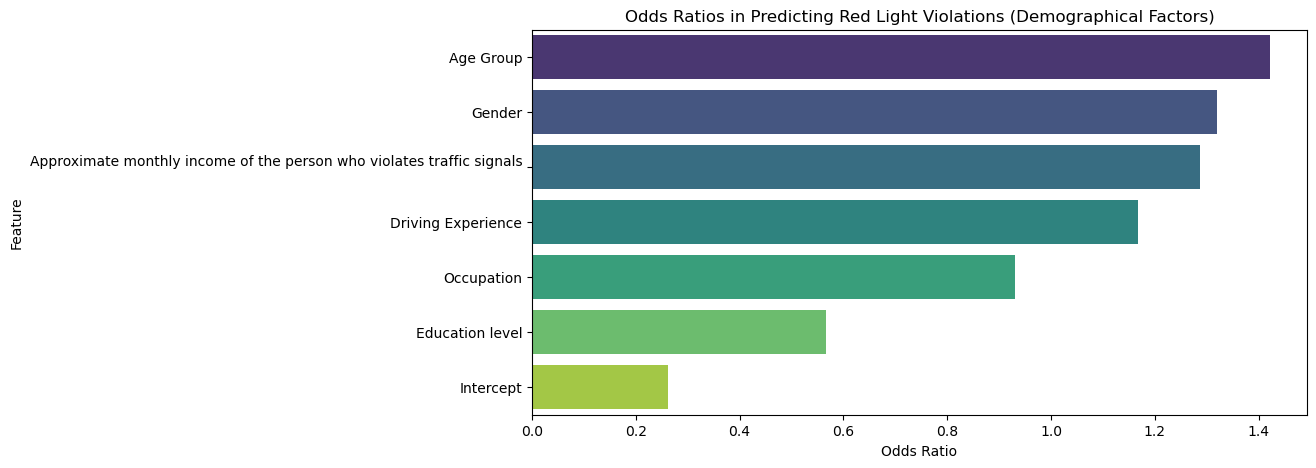

In [11]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df_dem["Odds_Ratio"], y=importance_df_dem["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations (Demographical Factors)")
plt.show()

In [24]:
# Print feature importance
print("Feature Importance Ranking:")
print(importance_df)

Feature Importance Ranking:
              Feature  Importance
4     Education_Level    0.560098
0           Age_Group    0.348144
1              Gender    0.272940
3      Monthly_Income    0.246921
5  Driving_Experience    0.154531
2          Occupation    0.066075


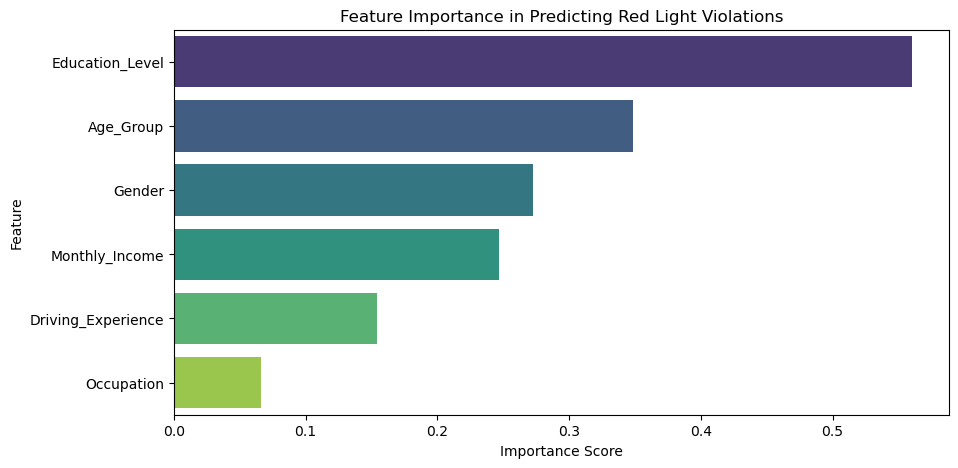

In [25]:
# Visualization of feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Red Light Violations")
plt.show()

In [14]:
# Get feature importance (coefficients) and calculate odds ratios
coefficients = log_reg.coef_[0]
odds_ratios = np.exp(coefficients)

In [15]:
# Create a DataFrame to display feature importance and odds ratios
importance_df = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients, "Odds_Ratio": odds_ratios})
importance_df = importance_df.sort_values(by="Odds_Ratio", ascending=False)

In [16]:
# Print feature importance and odds ratios
print("Feature Importance and Odds Ratios:")
print(importance_df)

Feature Importance and Odds Ratios:
              Feature  Coefficient  Odds_Ratio
0           Age_Group     0.348144    1.416437
1              Gender     0.272940    1.313821
3      Monthly_Income     0.246921    1.280077
5  Driving_Experience     0.154531    1.167110
2          Occupation    -0.066075    0.936060
4     Education_Level    -0.560098    0.571153


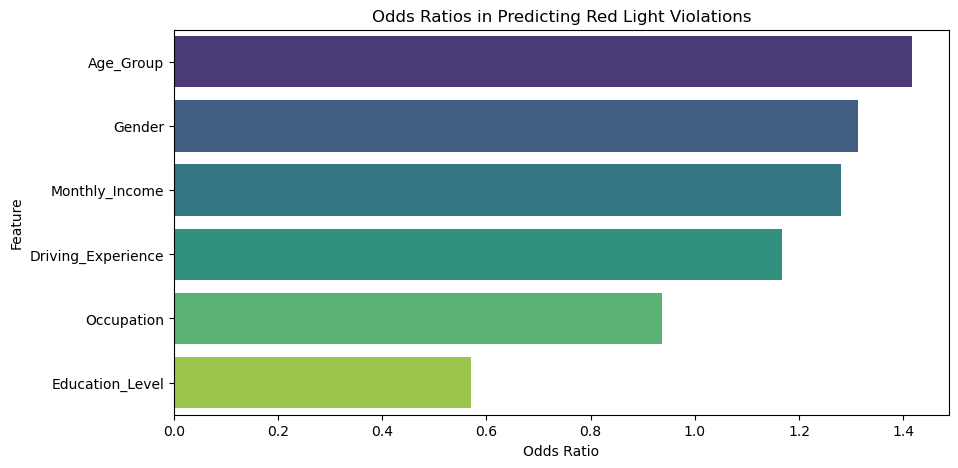

In [17]:
# Visualization of odds ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df["Odds_Ratio"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Odds Ratio")
plt.ylabel("Feature")
plt.title("Odds Ratios in Predicting Red Light Violations")
plt.show()